# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
#Variable containing the size of the training set
observations = 1000

# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [3]:
# We want to "make up" a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
targets = 2*xs - 3*zs + 5 + noise

print (targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

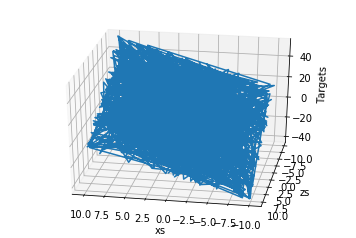

In [4]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations,1)

### Initialize variables

In [5]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[0.01375953]
 [0.0515366 ]]
[-0.09461884]


### Set a learning rate

In [6]:
learning_rate = 0.02

### Train the model

In [7]:

for i in range (100):
    
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print (loss)

    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

244.15142412862625
35.18220304923487
14.204225155458305
11.664248395699465
11.002099017513846
10.551186199292063
10.13796508112655
9.743278613592421
9.364450421580006
9.000634176854934
8.65121091091027
8.31560840327675
7.993279666769658
7.683699656417053
7.386364130579499
7.100788795773612
6.826508513789631
6.56307654359228
6.3100638136199585
6.067058222916125
5.833663969908446
5.609500907736752
5.3942039250791005
5.18742235146735
4.988819386123703
4.7980715493877835
4.614868155840886
4.4389108082691475
4.269912911641452
4.1075992063104385
3.951705319676325
3.8019773355832425
3.6581713807468335
3.5200532275393797
3.387397912485571
3.2599893698474864
3.1376200797019997
3.020090729937394
2.9072098916186575
2.798793707192713
2.694665591025724
2.59465594178473
2.4986018661951293
2.406346913724094
2.317740821757763
2.2326392708571663
2.150903649694249
2.072400829285118
1.9970029461528116
1.9245871940663812
1.8550356240171109
1.7882349521060492
1.7240763750299577
1.6624553928651462
1.6032716

### Print weights and biases and see if we have worked correctly.

In [8]:
print (weights, biases)

[[ 2.00065244]
 [-3.00519696]] [4.30062383]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

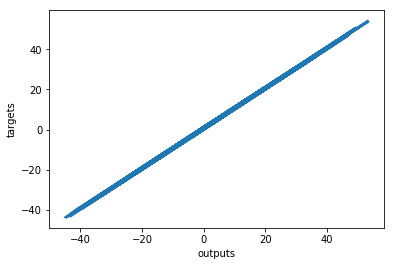

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()